Dataset shape: (503, 8)
  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  

📊 Model Evaluation Metrics:
Mea

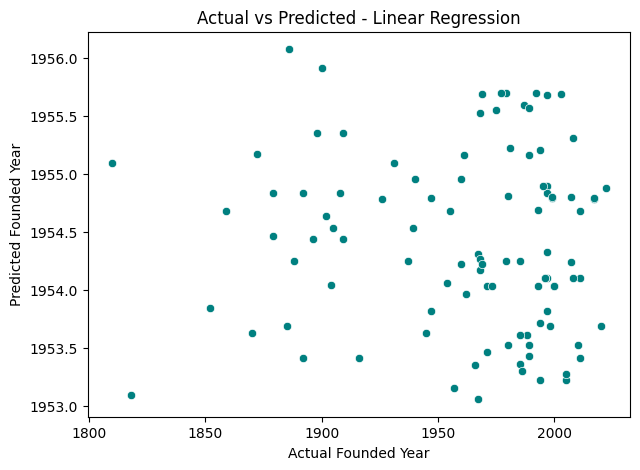

In [2]:
#PAYAL CHATTERJEE
#22BDS0226

# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/constituents.csv"
df = pd.read_csv(url)

print("Dataset shape:", df.shape)
print(df.head())

# Step 3: Data preprocessing
df = df[['GICS Sector', 'GICS Sub-Industry', 'Founded']].dropna()

# 🔹 Clean 'Founded' column to extract numeric year only
# Example: "1928 (2011)" → 1928
df['Founded'] = df['Founded'].astype(str).str.extract(r'(\d{4})').astype(float)

# Remove any rows that still have NaN after cleaning
df = df.dropna(subset=['Founded'])

# 🔹 Encode categorical columns
le_sector = LabelEncoder()
le_sub = LabelEncoder()

df['Sector_encoded'] = le_sector.fit_transform(df['GICS Sector'])
df['SubIndustry_encoded'] = le_sub.fit_transform(df['GICS Sub-Industry'])

# Step 4: Define features (X) and target (y)
X = df[['Sector_encoded', 'SubIndustry_encoded']]
y = df['Founded']

# Step 5: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score (Accuracy): {r2:.4f}")

# Step 9: Visualization — Actual vs Predicted
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.xlabel("Actual Founded Year")
plt.ylabel("Predicted Founded Year")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()
